<a href="https://colab.research.google.com/github/tariqueahmad275/thesparksfoundation/blob/main/Task-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 : THE SPARKS FOUNDATION**
### **By: Tarique Ahmad Sabir Nizamuddin**

---

---

### **Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied



In [1]:
# importing the required libraries
import math
import pandas as pd
import numpy as np

In [2]:
# Reading the Data 
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#statistical representation of data
data.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# Check if there any null value in the Dataset
data.isnull == True

False

There is no null value in the Dataset so, we can now visualize our Data.

Plotting the given data.

In [5]:
# importing the required libraries
import matplotlib.pyplot as plt 
import seaborn as sns

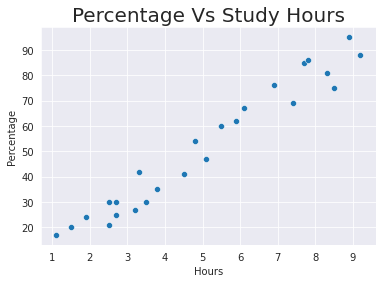

In [6]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Percentage Vs Study Hours',size=20)
plt.ylabel('Percentage')
plt.xlabel('Hours')
plt.show()

Text(0, 0.5, 'Percentage Obtained')

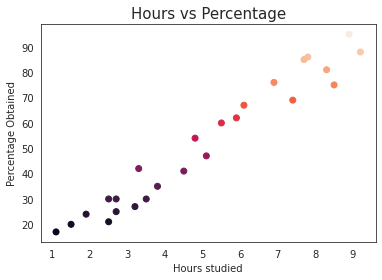

In [7]:
sns.set_style('white')
X = data.iloc[:,:-1].values
y = data['Scores'].values  
plt.scatter(X, y, c=y)
plt.title('Hours vs Percentage', size=15)  
plt.xlabel('Hours studied')
plt.ylabel('Percentage Obtained')

From the above scatterplot there seems to be correlation between the 'Percentage' and 'Hours', Lets plot a regression line to confirm the correlation.

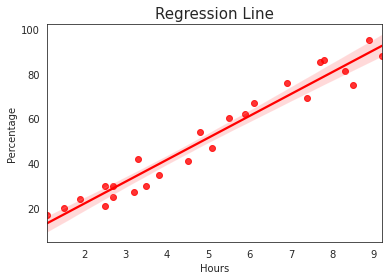

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.set_style('white')
sns.regplot(x= data['Hours'], y= data['Scores'], color= 'red')
plt.title('Regression Line',size=15)
plt.ylabel('Percentage')
plt.xlabel('Hours')
plt.show()
print(data.corr())

## **Training the Model**

**Splitting the Data**

In [9]:
# importing the required libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**Fitting the Data into the Model**

In [11]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("      Model Trained      ")

      Model Trained      


### Predicting the Percentage of Marks

In [12]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparing the Predicted Marks with the Actual Marks

In [13]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Evaluating the Model

In [14]:
# Calculating the accuracy of the model
print('Mean Absolute Error :',metrics.mean_absolute_error(val_y, pred_y))
print('Mean Square Error :',metrics.mean_squared_error(val_y, pred_y))
print('Root Mean Square Error :',math.sqrt(metrics.mean_squared_error(val_y, pred_y)))

Mean Absolute Error : 4.130879918502482
Mean Square Error : 20.33292367497996
Root Mean Square Error : 4.509204328368805


### **What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [15]:
hours = 9.25
own_pred = regression.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652
